In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 未优化中心点

# 数据加载和预处理

In [2]:

class Data_processing(object):
    def __init__(self,path):
        self.path=path
    
    def load(self):
        '''
        加载数据集
        '''
        data_train=pd.read_csv(self.path)
        data_train=data_train.loc[0:,['density','sugercontent']]
        data_train=np.array(data_train)
        return data_train
    def Norm(self):
        '''
        标准化
        '''
        
        data_train=self.load()
        data_max=data_train.max(axis=0)
        data_min=data_train.min(axis=0)
        
        final_data=(data_train-data_min)/(data_max-data_min)
        
        return final_data
        

In [3]:
data=Data_processing('./相关资料/watermelon.csv').Norm()

# kmeans算法

In [4]:

class k_means(object):
    def __init__(self,data,k,maxiter,center1,center2):
        '''
        data:数据集
        k（这里没用到，默认是两个）
        maxiter:最大迭代次数
        center1,center2:初始化的点
        '''
        self.data=data
        self.k=k
        self.maxiter=maxiter
        self.center=[center1,center2]
        
        
    def get_new_centers(self):
        
        distance1=np.linalg.norm(self.data-self.center[0],axis=1).reshape(-1,1)
        distance2=np.linalg.norm(self.data-self.center[1],axis=1).reshape(-1,1)
        distances=np.concatenate((distance1,distance2),axis=1)
        indexs=distances.argmin(axis=1)
        
        label1=np.where(indexs==0)
        label2=np.where(indexs==1)
        
        group1=self.data[label1]
        group2=self.data[label2]
        
        center1=np.mean(group1,axis=0)
        center2=np.mean(group2,axis=0)
        
        return center1,center2   
    
    def get_final_center(self):
        
        for i in range(self.maxiter):
            
            self.center[0],self.center[1]=self.get_new_centers()
            
        return self.center[0],self.center[1]
  
    

In [5]:
center1,center2=k_means(data,2,100,data[0],data[15]).get_final_center()

# 可视化

In [6]:
class visual(object):
    def __init__(self,center1,center2,data):
        
        self.center=[center1,center2]
        self.data=data
        
    def get_two_groups(self):
        distance1=np.linalg.norm(self.data-self.center[0],axis=1).reshape(-1,1)
        distance2=np.linalg.norm(self.data-self.center[1],axis=1).reshape(-1,1)
        distances=np.concatenate((distance1,distance2),axis=1)
        indexs=distances.argmin(axis=1)
        
        label1=np.where(indexs==0)
        label2=np.where(indexs==1)
        
        group1=self.data[label1]
        group2=self.data[label2]
        
        return group1,group2
    
    
    def vis(self):
        
        group1,group2= self.get_two_groups()
        
        plt.scatter(group1[:,0],group1[:,1],color='red')
        plt.scatter(group2[:,0],group2[:,1],color='blue')

   
        

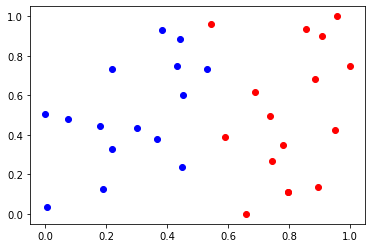

In [7]:
visual(center1,center2,data).vis()

# 优化中心点

In [8]:
def get_good_center(data):
    '''
    寻找相距最远的两个点，来作为初始化的点
    '''
    m,n=data.shape
    index_distance=np.zeros((m,n))
    for i in range(m):
        
        distance=np.linalg.norm(data-data[i],axis=1).reshape(-1,1)
        
        max_dis=max(distance)[0]
        index=distance.argmax(axis=0)
        
        index_distance[i,0],index_distance[i,1]=index,max_dis
        
    
    center1_index=index_distance[:,1].argmax(axis=0)
    center2_index=index_distance[center1_index,0]
    
    center11=data[int(center1_index)]
    center22=data[int(center2_index)]
    
    return center11,center22
        

    

In [9]:
center1,center2=get_good_center(data)

In [10]:
center1,center2=k_means(data,2,100,center1,center2).get_final_center()

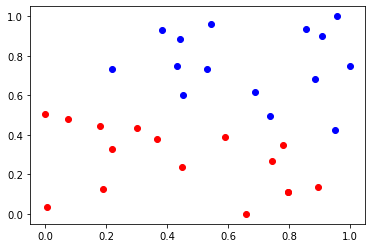

In [11]:
visual(center1,center2,data).vis()